# Exercise: NEISS, Question Set R

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Using codebooks
- Reading tab-separated files
- Ignoring bad lines
- Replacing LOTS of values
- Merging dataframes
- Using numpy/`np.nan`
- Padding strings
- String search using regular expressions

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [1]:
import pandas as pd
df = pd.read_csv('nss15.tsv', sep='\t', error_bad_lines=False)
df

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY
5,150721815,07/02/2015,32,5.6748,C,216,2,1,NaN,71,DOG SCRATCH/BITE,76,1,1,0,1715,NaN,16 MOF AT HOME PULLED FAMILY DOG-HUSKIES COLLA...,"ND SCRAPING TEETH ON PTS FACE, NOT A TRUE BITE..."
6,150713483,06/08/2015,93,15.7762,V,25,1,2,NaN,51,NaN,33,4,9,3,1138,NaN,25 YOM WAS CAMPING WHEN FRIEND THREW A PRESSUR...,WHICH FLASHED. FD NS. DX: BURNS L UPPER & LOW...
7,150704114,06/14/2015,56,83.2157,S,53,1,1,NaN,57,NaN,30,1,0,0,5040,NaN,53 YOM BIKE WRECK SUNDAY PAIN CHEST SHOULDER &...,NaN
8,150736558,07/16/2015,70,83.2157,S,98,1,2,NaN,59,NaN,76,1,1,0,1807,NaN,98 Y/O M FELL IN FLOOR AND LACERATED FACE,NaN
9,150734928,07/13/2015,51,74.8813,L,48,2,2,NaN,53,NaN,79,1,5,0,4057,1807.0,"48 YO F, C/O RT FLANK PAIN 6 DAYS S/P FALL WAS...",ABLE WHICH HIT THE FLOOR STRIKING RT FLANK DX ...


### Check that your dataframe has 357727 rows and 19 columns.

In [2]:
df.shape

(357727, 19)

### List the columns and their data types

In [3]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [4]:
# trmt_date = Date of Treatment
# CPSC Case # = Case Number Date of Birth
# Age of Patient
# Gender of Patient Diagnosis
# body_part = Body Part Affected Disposition of Case Product(s)
# Mentioned Whether Intentionally Inflicted Incident Locale
# fmv = Fire Involvement
# Whether Work-Related
# Race and Ethnicity
# Other Race and/or Ethnicity Comments

df

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY
5,150721815,07/02/2015,32,5.6748,C,216,2,1,NaN,71,DOG SCRATCH/BITE,76,1,1,0,1715,NaN,16 MOF AT HOME PULLED FAMILY DOG-HUSKIES COLLA...,"ND SCRAPING TEETH ON PTS FACE, NOT A TRUE BITE..."
6,150713483,06/08/2015,93,15.7762,V,25,1,2,NaN,51,NaN,33,4,9,3,1138,NaN,25 YOM WAS CAMPING WHEN FRIEND THREW A PRESSUR...,WHICH FLASHED. FD NS. DX: BURNS L UPPER & LOW...
7,150704114,06/14/2015,56,83.2157,S,53,1,1,NaN,57,NaN,30,1,0,0,5040,NaN,53 YOM BIKE WRECK SUNDAY PAIN CHEST SHOULDER &...,NaN
8,150736558,07/16/2015,70,83.2157,S,98,1,2,NaN,59,NaN,76,1,1,0,1807,NaN,98 Y/O M FELL IN FLOOR AND LACERATED FACE,NaN
9,150734928,07/13/2015,51,74.8813,L,48,2,2,NaN,53,NaN,79,1,5,0,4057,1807.0,"48 YO F, C/O RT FLANK PAIN 6 DAYS S/P FALL WAS...",ABLE WHICH HIT THE FLOOR STRIKING RT FLANK DX ...


# Cleaning up a column

Take a look at the **body part** column. How many rows of each body part are there?

In [5]:
df['body_part'].value_counts()

75    58677
76    30992
79    30579
92    30463
37    20077
31    19518
35    18957
82    17077
83    15890
30    14822
33    13655
36    12771
34    11565
32     8888
85     8615
88     7336
93     7299
89     6145
77     4661
94     4404
81     4174
80     4016
0      3344
87     2079
38     1699
84       24
Name: body_part, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to pages 11-12 of the column definitions file, or... hey, I typed it in below!

- Tip: If I've already talked about how to replace values, maybe there's a really easy way to replace a lot at once? Maybe I'll tell you if you ask me?

In [6]:
# 0:  'internal'
# 30: 'shoulder'
# 31: 'upper trunk'
# 32: 'elbow'
# 33: 'lower arm'
# 34: 'wrist'
# 35: 'knee'
# 36: 'lower leg'
# 37: 'ankle'
# 38: 'pubic region'
# 75: 'head'
# 76: 'face'
# 77: 'eyeball'
# 79: 'lower trunk'
# 80: 'upper arm'
# 81: 'upper leg'
# 82: 'hand'
# 83: 'foot'
# 84: '25-50% of body'
# 85: 'all parts of body'
# 87: 'not recorded'
# 88: 'mouth'
# 89: 'neck'
# 92: 'finger'
# 93: 'toe'
# 94: 'ear'


In [7]:
body_part_codes = {
    0: 'internal',
    30: 'shoulder',
    31: 'upper trunk',
    32: 'elbow',
    33: 'lower arm',
    34: 'wrist',
    35: 'knee',
    36: 'lower leg',
    37: 'ankle',
    38: 'pubic region',
    75: 'head',
    76: 'face',
    77: 'eyeball',
    79: 'lower trunk',
    80: 'upper arm',
    81: 'upper leg',
    82: 'hand',
    83: 'foot',
    84: '25-50% of body',
    85: 'all parts of body',
    87: 'not recorded',
    88: 'mouth',
    89: 'neck',
    92: 'finger',
    93: 'toe',
    94: 'ear'
}

In [8]:
for code in body_part_codes.keys():
    df['body_part'] = df['body_part'].replace(code, body_part_codes[code])

In [9]:
df.set_index('CPSC Case #')

,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
CPSC Case #,,,,,,,,,,,,,,,,,,
150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,lower arm,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,wrist,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,ear,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,knee,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,head,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY
150721815,07/02/2015,32,5.6748,C,216,2,1,NaN,71,DOG SCRATCH/BITE,face,1,1,0,1715,NaN,16 MOF AT HOME PULLED FAMILY DOG-HUSKIES COLLA...,"ND SCRAPING TEETH ON PTS FACE, NOT A TRUE BITE..."
150713483,06/08/2015,93,15.7762,V,25,1,2,NaN,51,NaN,lower arm,4,9,3,1138,NaN,25 YOM WAS CAMPING WHEN FRIEND THREW A PRESSUR...,WHICH FLASHED. FD NS. DX: BURNS L UPPER & LOW...
150704114,06/14/2015,56,83.2157,S,53,1,1,NaN,57,NaN,shoulder,1,0,0,5040,NaN,53 YOM BIKE WRECK SUNDAY PAIN CHEST SHOULDER &...,NaN
150736558,07/16/2015,70,83.2157,S,98,1,2,NaN,59,NaN,face,1,1,0,1807,NaN,98 Y/O M FELL IN FLOOR AND LACERATED FACE,NaN


## Confirm you have 58677 head, 30992 face, and 30579 lower trunk.

Isn't this much nicer?

In [10]:
df['body_part'].value_counts().head(3)

head           58677
face           30992
lower trunk    30579
Name: body_part, dtype: int64

## Graph the number of each body part, but don’t included the “Not Recorded” records

In [11]:
import numpy as np
df.body_part.replace("NaN", np.nan, inplace=True)

%matplotlib inline

In [12]:
df['body_part'].value_counts()

head                 58677
face                 30992
lower trunk          30579
finger               30463
ankle                20077
upper trunk          19518
knee                 18957
hand                 17077
foot                 15890
shoulder             14822
lower arm            13655
lower leg            12771
wrist                11565
elbow                 8888
all parts of body     8615
mouth                 7336
toe                   7299
neck                  6145
eyeball               4661
ear                   4404
upper leg             4174
upper arm             4016
internal              3344
not recorded          2079
pubic region          1699
25-50% of body          24
Name: body_part, dtype: int64

## "Not Recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [13]:
import numpy as np
df.body_part.replace("not recorded", np.nan, inplace=True)

df['body_part'].value_counts(dropna=False)

head                 58677
face                 30992
lower trunk          30579
finger               30463
ankle                20077
upper trunk          19518
knee                 18957
hand                 17077
foot                 15890
shoulder             14822
lower arm            13655
lower leg            12771
wrist                11565
elbow                 8888
all parts of body     8615
mouth                 7336
toe                   7299
neck                  6145
eyeball               4661
ear                   4404
upper leg             4174
upper arm             4016
internal              3344
NaN                   2079
pubic region          1699
25-50% of body          24
Name: body_part, dtype: int64

## Graph the count of each body part, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

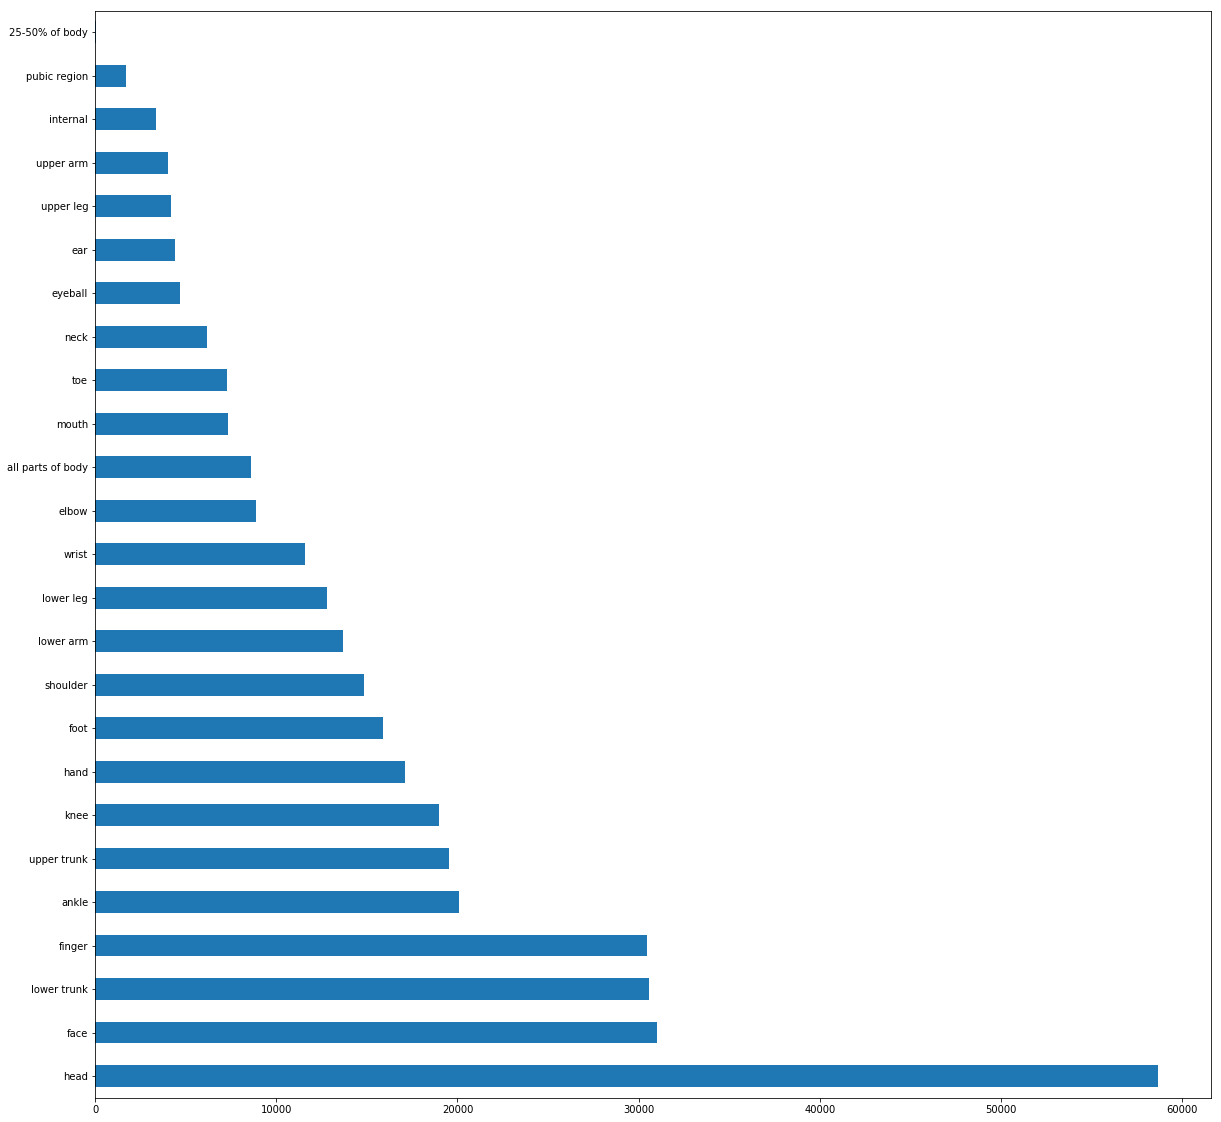

In [207]:
df['body_part'].value_counts().plot(kind = 'barh',figsize = (20,20))

## For each body part, get the average age of the person who injured that part

Sort from youngest to oldest

In [46]:
df.groupby('body_part')['age'].mean()

body_part
25-50% of body       44.333333
all parts of body    63.406268
ankle                28.477512
ear                  24.248183
elbow                36.592934
eyeball              36.669599
face                 47.749193
finger               35.978170
foot                 32.578666
hand                 35.811208
head                 59.512637
internal             62.912978
knee                 34.106451
lower arm            32.357598
lower leg            44.255814
lower trunk          49.667844
mouth                51.241957
neck                 38.354109
pubic region         19.985874
shoulder             39.266901
toe                  34.988766
upper arm            46.655129
upper leg            45.934835
upper trunk          46.587663
wrist                30.697968
Name: age, dtype: float64

## Wait, "not recorded" seems really really really really old!

How can the average age be like 80???? Read page 6 of the documentation. Fix the issue however you think is best, but explain what you're doing. **It would be nice to talk about this in class if you'd write it on the board!**

### Tech tip you might find useful

If you want to replace a column based on a condition, pandas will probably yell at you. You get to learn this new thing called `loc` now! 

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

In [52]:
df.loc[df.age.isin([201,202,209]), 'age'] = 0

In [53]:
df.loc[df.age.isin([212,218]), 'age'] = 1

In [55]:
df.groupby('body_part')['age'].mean().sort_values()

body_part
pubic region         19.861683
ear                  22.987057
ankle                28.328784
wrist                30.478599
lower arm            31.208934
foot                 32.004783
knee                 34.016564
toe                  34.147417
finger               34.585694
elbow                34.881526
hand                 34.901798
eyeball              35.204677
neck                 37.906428
shoulder             38.949669
lower leg            42.125440
face                 42.991933
upper leg            44.332774
25-50% of body       44.333333
mouth                44.631270
upper arm            45.755976
upper trunk          46.039041
internal             49.042464
lower trunk          49.413029
head                 53.205805
all parts of body    55.592687
Name: age, dtype: float64

# Finding injuries

## How many people were injured by "Musical instruments, electric or battery operated?"

Try to do what you think would work, then see... it doesn't work. There are all kinds of reasons why it wouldn't work. Keep reading once it doesn't work for you.

- Tip: `prod1` and `prod2` are the product fields
- Tip: You can use the codebook or `cleaned-categories.txt`

In [82]:
df.prod1 = df.prod1.astype(str).str.pad(4, fillchar='0')

In [91]:
df[df['prod1'] == '0565']['trmt_date'].count()

14

### Did something go wrong when you read in your data?

Maybe it's one of those problems like we had with `008382` in the homework, where when we read in the file it got rid of the leading zeroes? Try to read the file in again and fix that.

Try to get all of the "Musical instruments, electric or battery operated" injurie again. It still won't work. Keep reading.

In [ ]:
#fixed above

### Looks the data export is bad!

They turned `0565` into `565` when they exported it or something (so irresponsible!), and it's up to us to fix it. Pad the `prod1` and `prod2` columns to be the proper length. If you didn't actually do the task above it's going to be more difficult.

In [ ]:
#fixed above

In [ ]:
#fixed above

## How many people were injured by musical instruments, total?

Include normal musical instruments, electric musical instruments and toy musical instruments.

- Tip: You can use the codebook or `cleaned-categories.txt`
- Tip: Answer this in one line **without** using `and` or `&`.

In [94]:
df[df['prod1'].isin(['0565','0566','1344'])]['trmt_date'].count()

226

## Out of those three, which is the most popular reason for admission?

In [103]:
df[df['prod1'].isin(['0565','0566','1344'])]['prod1'].value_counts()

0566    188
1344     24
0565     14
Name: prod1, dtype: int64

## What parts of the body are injured by musical instruments most often?

In [104]:
df[df['prod1'].isin(['0565','0566','1344'])]['body_part'].value_counts()

face                 32
head                 30
finger               23
upper trunk          19
mouth                18
lower trunk          15
shoulder             13
wrist                12
toe                  10
foot                  8
knee                  6
all parts of body     6
lower arm             6
neck                  5
eyeball               5
hand                  4
elbow                 4
ear                   3
lower leg             3
ankle                 2
upper arm             1
internal              1
Name: body_part, dtype: int64

# Adding categories

## Read in `categories-cleaned.txt`

In [122]:
df_categories = pd.read_csv('categories-cleaned.txt', header=None, names = ['Code', 'Category'])

In [123]:
df_categories

,Code,Category
0,102,Wringer washing machines
1,106,Electric clothes dryers without washers
2,107,Gas clothes dryers without washers
3,110,Electric heating pads
4,112,Sewing machines or accessories
5,113,Floor buffers or waxers
6,114,Rug shampooers
7,115,Vacuum cleaners
8,116,Electric brooms
9,118,Gas water heaters


## How many different categories are electric/electrical/electronic?

In [124]:
df_categories[df_categories['Category'].str.contains('electr*', case = False)].count()

Code        64
Category    64
dtype: int64

## Join this with your injuries dataframes to give every row a text product code

In [130]:
df_categories['Code'] = df_categories.Code.astype(str).str.pad(4, fillchar='0')

In [132]:
df_combined = df.merge(df_categories, left_on = 'prod1', right_on = 'Code')

In [141]:
df_combined.rename(columns={'Category': 'Text Product Code'}, inplace = True)
df_combined

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,...,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,Code,Text Product Code
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,...,lower arm,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT,1267,"Soccer (activity, apparel or equipment)"
1,150821622,07/20/2015,43,83.2157,S,20,2,1,NaN,57,...,lower leg,1,9,0,1267,NaN,L DISTAL FIB FX/20YOWF WHILE PLAYING SOCCER AT...,LE CAUSING INJURY TO DISTAL FIB.,1267,"Soccer (activity, apparel or equipment)"
2,150948626,09/08/2015,37,5.6748,C,10,2,0,NaN,57,...,lower arm,1,0,0,1267,NaN,10 YO F TRIPPED FORWARD WHEN PLAYING SOCCER FX...,NaN,1267,"Soccer (activity, apparel or equipment)"
3,151029422,10/06/2015,24,97.9239,M,37,1,1,NaN,64,...,knee,1,0,0,1267,NaN,J/ 37 YOM. LT KNEE PAIN AFTER HE KICKED THE BA...,DXL KNEE SPRAIN,1267,"Soccer (activity, apparel or equipment)"
4,151029234,10/10/2015,21,16.5650,V,13,2,0,NaN,62,...,head,1,9,0,1267,NaN,13YF H/A&VOMITINGX4 S/P GOT STRUCK TO HEAD C T...,>>CHI,1267,"Soccer (activity, apparel or equipment)"
5,151038066,10/16/2015,21,16.5650,V,13,2,0,NaN,64,...,wrist,1,9,0,1267,NaN,13YF WRIST PAIN S/P FOOSH WHILE PLAYING SOCCER...,>>SPRAIN,1267,"Soccer (activity, apparel or equipment)"
6,150959538,09/18/2015,32,5.6748,C,15,1,1,NaN,64,...,foot,1,9,0,1267,NaN,15 YOM PLAYING SOCCER BEGAN HAVING HEEL PAIN D...,NaN,1267,"Soccer (activity, apparel or equipment)"
7,150442809,04/15/2015,25,15.0591,V,15,2,1,NaN,64,...,foot,1,8,0,1267,NaN,A 15YOF INJURED FOOT WHILE PLAYING SOCCER AT S...,NaN,1267,"Soccer (activity, apparel or equipment)"
8,151042493,10/15/2015,8,5.6748,C,17,2,1,NaN,57,...,face,1,9,0,1267,NaN,17YOF COLLIDED HEADS PLAYING SOCCER GAME; ORBI...,COMPLEX RFX.,1267,"Soccer (activity, apparel or equipment)"
9,151026219,09/02/2015,14,49.2646,M,15,1,0,NaN,52,...,head,1,8,0,1267,NaN,15YOM CONCUSSION - KNEED PLAYING SOCCER,NaN,1267,"Soccer (activity, apparel or equipment)"


## How many different injuries involved an electric/electrical/electronic product?

In [154]:
df_combined[df_combined['Text Product Code'].str.contains('electric*', case=False)]['Text Product Code'].count()

2835

## Graph the most common injuries involving an electrical product

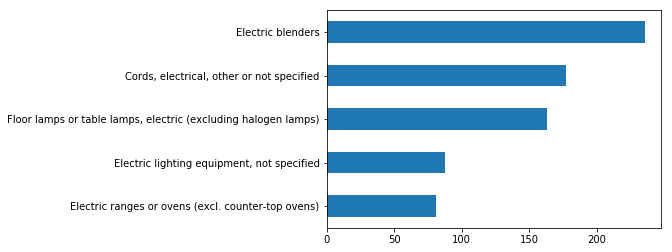

In [182]:
check_electric = df_combined['Text Product Code'].str.contains('electric*', case=False)
check_non_electric = df_combined['Text Product Code'].str.contains('nonelectr*|not electr*', case=False)
electric_injuries = df_combined[(check_electric == True) & (check_non_electric == False)]
electric_injuries['Text Product Code'].value_counts().head(5).sort_values().plot(kind = "barh")

## When people get injuries using an electrical product, what part of their body is injured?

In [186]:
electric_injuries['body_part'].value_counts().head(10)

finger               288
head                 186
hand                 168
lower trunk          108
face                  91
foot                  82
all parts of body     76
upper trunk           56
lower arm             51
lower leg             41
Name: body_part, dtype: int64

## What product is most likely to injure your mouth?

In [193]:
df_combined[df_combined['body_part'] == 'mouth']['Text Product Code'].value_counts().head(1)

Floors or flooring materials    655
Name: Text Product Code, dtype: int64

## What product is most likely to injure your ears?

In [206]:
df_combined[df_combined['body_part'] == 'ear']['Text Product Code'].value_counts().head(1)

Jewelry (excluding watches)    1209
Name: Text Product Code, dtype: int64